In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/navee/OneDrive/Desktop/New folder/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.drop(0,inplace=True)
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.Attrition.value_counts()

No     1233
Yes     236
Name: Attrition, dtype: int64

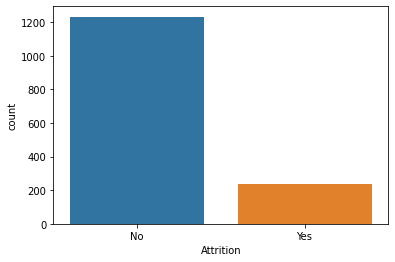

In [10]:
sns.countplot(x='Attrition',data=df)
plt.show()

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.shape

(1469, 35)

<AxesSubplot:title={'center':'Count of different Attrition'}>

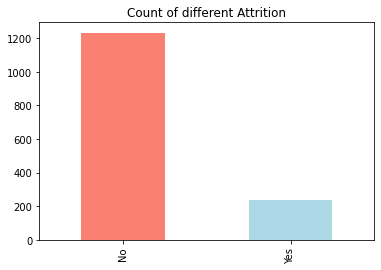

In [13]:
df['Attrition'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different Attrition")

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

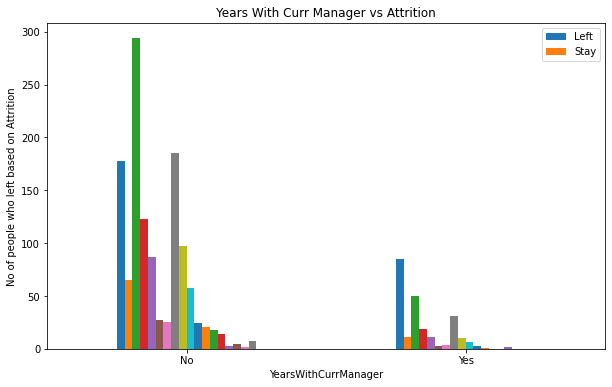

In [14]:
#Create a plot for crosstab

pd.crosstab(df['Attrition'],df['YearsWithCurrManager']).plot(kind="bar",figsize=(10,6))
plt.title("Years With Curr Manager vs Attrition")
plt.xlabel("YearsWithCurrManager")
plt.ylabel("No of people who left based on Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [15]:
promoted_dict = df["YearsSinceLastPromotion"].value_counts()
promoted_dict

0     580
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

<AxesSubplot:title={'center':'Years Since Last Promotion'}>

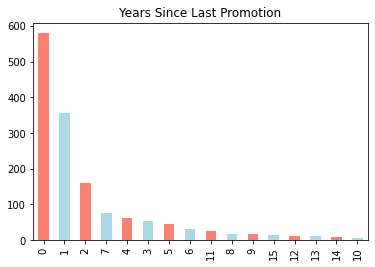

In [16]:
df['YearsSinceLastPromotion'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Years Since Last Promotion")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

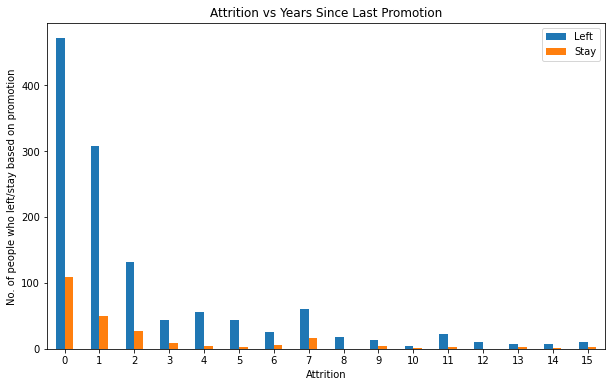

In [17]:
#Create a plot for crosstab

pd.crosstab(df['YearsSinceLastPromotion'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Years Since Last Promotion")
plt.xlabel("Attrition")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [18]:
func_dict = df["Department"].value_counts()
func_dict

Research & Development    961
Sales                     445
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:title={'center':'Departments in organization'}>

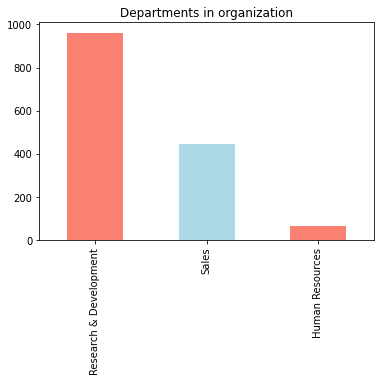

In [19]:
df['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Departments in organization")

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

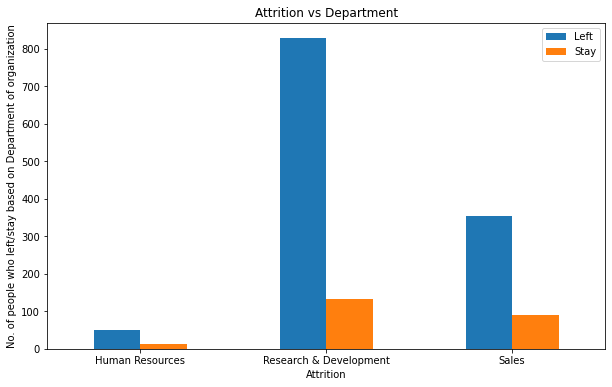

In [20]:
#Create a plot for crosstab

pd.crosstab(df['Department'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Department")
plt.xlabel("Attrition")
plt.ylabel("No. of people who left/stay based on Department of organization")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [21]:
Edu_dict = df["EducationField"].value_counts()
Edu_dict

Life Sciences       605
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [22]:
Marital_dict = df["RelationshipSatisfaction"].value_counts()
print(Marital_dict)

3    459
4    432
2    303
1    275
Name: RelationshipSatisfaction, dtype: int64


In [23]:
Emp_dict = df["EmployeeNumber"].value_counts()
Emp_dict['other group'] = 1
print(Emp_dict)

2048           1
1369           1
1367           1
1364           1
1363           1
              ..
647            1
645            1
644            1
2046           1
other group    1
Name: EmployeeNumber, Length: 1470, dtype: int64


In [24]:
job_dict = df["JobRole"].value_counts()
job_dict

Sales Executive              325
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:title={'center':'Job Role'}>

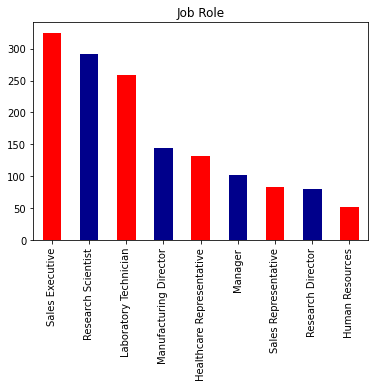

In [25]:
df['JobRole'].value_counts().plot(kind='bar',color=['Red','Darkblue'],title="Job Role")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

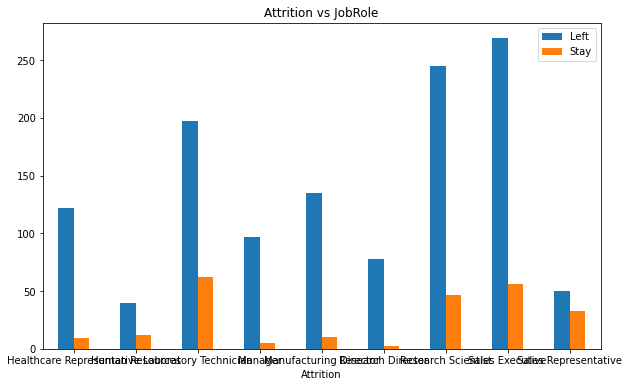

In [26]:
#Create a plot for crosstab

pd.crosstab(df['JobRole'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs JobRole")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [27]:
tenure_dict = df["TotalWorkingYears"].value_counts()
print(tenure_dict)

10    202
6     125
8     102
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


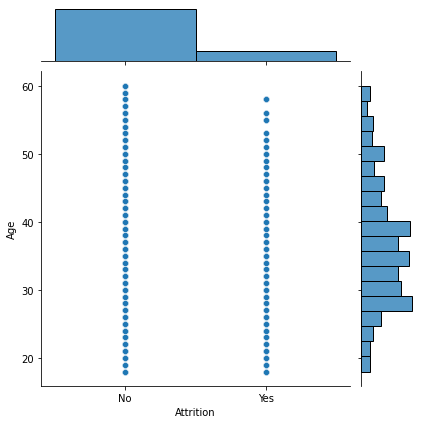

In [28]:
# Its Age vs Attrition
sns.jointplot(x='Attrition',y='Age',data=df)

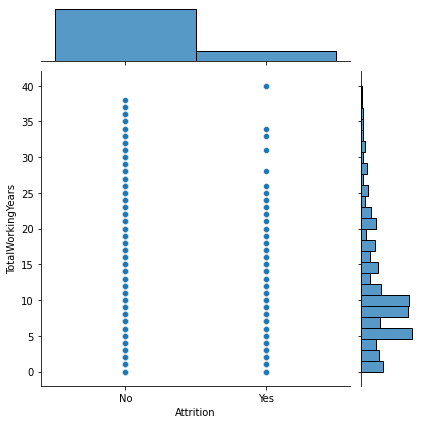

In [29]:
sns.jointplot(x='Attrition',y='TotalWorkingYears',data=df)

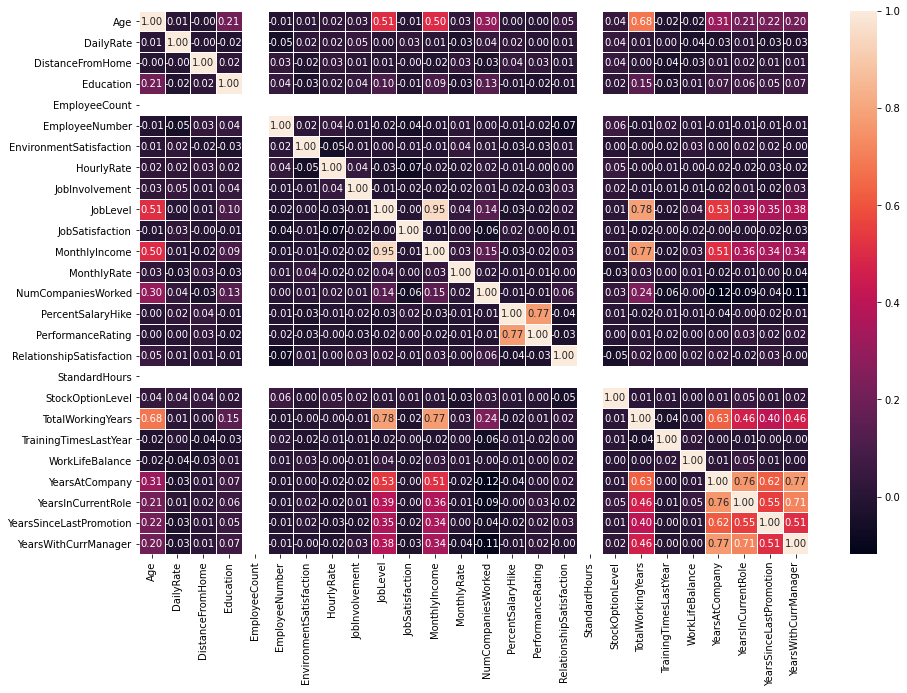

In [30]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

# Data Cleaning

In [31]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [32]:
Travel_dict = df["BusinessTravel"].value_counts()
print(Travel_dict)


Travel_Rarely        1042
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [33]:
Travel_dict_new = {
    'Travel_Rarely': 1042,
    'Travel_Frequently': 277,
    'Non-Travel': 150,
   
}

print(Travel_dict_new)

{'Travel_Rarely': 1042, 'Travel_Frequently': 277, 'Non-Travel': 150}


In [34]:
def BusinessTravel(x):
    if str(x) in Travel_dict_new.keys():
        return Travel_dict_new[str(x)]
    else:
        return Travel_dict_new['other place']
    
data_l = df["BusinessTravel"].apply(BusinessTravel)
df['New Travel'] = data_l
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New Travel
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,277
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1042
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,277
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,1042
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,277


In [35]:
gen = pd.get_dummies(df["Department"])
gen.head()

,Human Resources,Research & Development,Sales
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [36]:
hr = pd.get_dummies(df["EducationField"])
hr.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0


In [37]:
#promotion
def YearsSinceLastPromotion (x):
    if x == "YearsSinceLastPromotion":
          return int(1)
    else:
        return int(0)
data_1 = df["YearsSinceLastPromotion"].apply(YearsSinceLastPromotion)
df ['YearsSinceLastPromotion'] = data_1
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New Travel
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,0,7,277
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1042
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,0,0,277
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,0,2,1042
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,0,6,277


In [38]:
attrition = pd.get_dummies(df["Attrition"])
attrition.head()

,No,Yes
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0


In [39]:
business_travel = pd.get_dummies(df["BusinessTravel"])
business_travel.head()

,Non-Travel,Travel_Frequently,Travel_Rarely
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0


In [40]:
dataset = pd.concat([df,business_travel,attrition,hr,gen],axis=1)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Yes,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Research & Development,Sales
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,1,0,0,0,0,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,1,0,0,0,0,1,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,1,0,0,0,0,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0,0,0,0,1,0,0,0,1,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,0,0,1,0,0,0,0,0,1,0


In [41]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'New Travel', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'No', 'Yes', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Human Resources',
       'Research & Development', 'Sales'],
      dtype='object')

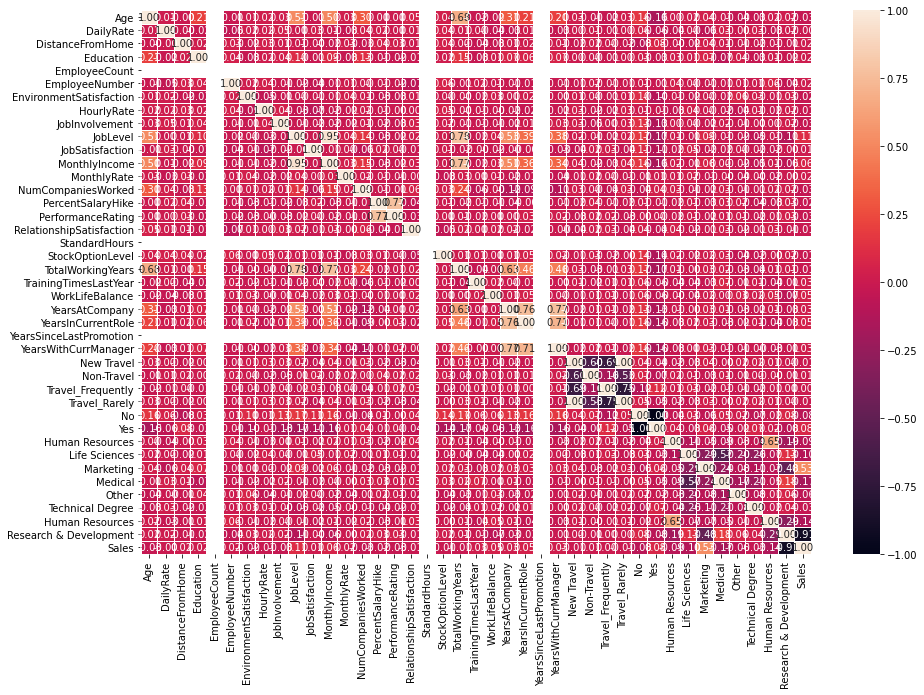

In [42]:
# Let's make our correlation matrix visual
corr_matrix=dataset.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [43]:
#target
def Target(x):
    if x in "Attrition":
        return False
    else :
        return True
    
data_1 = dataset["Attrition"].apply(Target)
dataset['Attrition'] = data_1
dataset['Attrition'].head()

1    True
2    True
3    True
4    True
5    True
Name: Attrition, dtype: bool

In [44]:
dataset.to_csv("processed table.csv")

In [45]:
dataset = pd.read_csv("processed table.csv")
dataset = pd.DataFrame(dataset)
y = dataset.Attrition
X = dataset.drop("Attrition",axis=1)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,Unnamed: 0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Yes,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources.1,Research & Development,Sales
919,920,34,Travel_Frequently,135,Research & Development,19,3,Medical,1,1285,...,0,0,0,0,1,0,0,0,1,0
953,954,42,Non-Travel,495,Research & Development,2,1,Life Sciences,1,1334,...,0,0,1,0,0,0,0,0,1,0
772,773,36,Travel_Rarely,796,Research & Development,12,5,Medical,1,1073,...,0,0,0,0,1,0,0,0,1,0
336,337,29,Travel_Rarely,738,Research & Development,9,5,Other,1,455,...,0,0,0,0,0,1,0,0,1,0
225,226,37,Travel_Frequently,319,Sales,4,4,Marketing,1,311,...,0,0,0,1,0,0,0,0,0,1


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [48]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [49]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

ValueError: could not convert string to float: 'Travel_Frequently'

In [ ]:
dataset.tail()